In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set_theme(style="darkgrid")
current_palette = sns.color_palette()


In [2]:
pd.options.display.min_rows = 20
pd.options.display.max_columns = 500


### Load in the data

In [3]:
## Read in 2022 data from filesystem
df_flights = pd.read_csv("../../data/eda/flights/flight_data_Y2022/flight_data_2022.csv.zip",  low_memory=False)


In [4]:
df_flights = df_flights.rename(columns={"Operating_Airline ": "Operating_Airline", "Flight_Number_Operating_Airline": "Flight_Number"})

In [5]:
airlines = pd.read_csv(
    "../../data/databases/flight_attributes/airlines.csv.zip", low_memory=False)
airline_mapper = airlines.set_index("Code")["Description"]


In [6]:
cancellation_codes = pd.read_csv(
    "../../data/databases/flight_attributes/cancellation_codes.csv", low_memory=False)
cancellation_code_mapper = cancellation_codes.set_index(
    "CANCELLATION_REASON")["CANCELLATION_DESCRIPTION"]


In [7]:
usa_airports = (pd.read_csv("../../data/databases/flight_attributes/usa_airports.csv.zip",
                            usecols= ["iata","latitude","longitude"], 
                            low_memory=False))
usa_airports = usa_airports.rename(columns={"iata": "Origin"})
usa_airports.head()



,Origin,latitude,longitude
0,00M,31.953765,-89.234505
1,00R,30.685861,-95.017928
2,00V,38.945749,-104.569893
3,01G,42.741347,-78.052081
4,01J,30.688012,-81.905944


### Clean the data
- Handling missing values
- Feature Selection
- Encoding Categorical Variables
- Train - Test Split

In [8]:
# df_flights[SELECTED_COLUMNS].columns.to_list()


In [9]:
def airline_mapping(df_flights):
    df_flights["Operating_Airline"] = (
        df_flights["Operating_Airline"].map(airline_mapper))
    df_flights["CancellationCode"] = (
        df_flights["CancellationCode"].map(cancellation_code_mapper))
    return df_flights

def tweak_df_flights(df_flights):
    SELECTED_COLUMNS = ["FlightDate", "Operating_Airline", "Tail_Number", "Flight_Number", "OriginAirportID",
                        "Origin", "OriginCityName", "OriginState", "OriginStateName", "DestAirportID", "Dest", "DestCityName",
                        "DestState", "DestStateName", "CRSDepTime", "DepTime", "DepDelay", "DepDel15", "DepDelayMinutes", "DepTimeBlk",
                        "TaxiOut", "WheelsOn", "TaxiIn", "CRSArrTime", "ArrTime", "ArrDelayMinutes", "ArrDel15", "ArrTimeBlk",
                        "Cancelled", "CancellationCode", "Diverted", "CRSElapsedTime", "AirTime", "Distance", "CarrierDelay",
                        "WeatherDelay", "NASDelay", "SecurityDelay", "LateAircraftDelay", "FirstDepTime", "TotalAddGTime",
                        ]
    df_flights = (
        df_flights[SELECTED_COLUMNS]
        .copy()
    )
    df_flights = (pd.merge(df_flights, usa_airports, how="left", on=["Origin"]))
    df_flights.pipe(airline_mapping)
    return df_flights.assign(
        DepTime=df_flights.DepTime.fillna(0).astype("float16"),
        DepDelay=df_flights.DepDelay.fillna(0).astype("float16"),
        DepDel15=df_flights.DepDel15.fillna(0).astype("float16"),
        DepDelayMinutes=df_flights.DepDelayMinutes.fillna(0).astype("float16"),
        TaxiOut=df_flights.TaxiOut.fillna(0).astype("float16"),
        WheelsOn=df_flights.WheelsOn.fillna(0).astype("float16"),
        TaxiIn=df_flights.TaxiIn.fillna(0).astype("float16"),
        ArrDel15=df_flights.ArrDel15.fillna(0).astype("float16"),
        ArrDelayMinutes=df_flights.ArrDelayMinutes.fillna(0).astype("float16"),
        CRSElapsedTime=df_flights.CRSElapsedTime.fillna(0).astype("float16"),
        ArrTime=df_flights.ArrTime.fillna(0).astype("float16"),
        AirTime=df_flights.AirTime.fillna(0).astype("float16"),
        Distance=df_flights.Distance.fillna(0).astype("float16"),
        CarrierDelay=df_flights.CarrierDelay.fillna(0).astype("float16"),
        WeatherDelay=df_flights.WeatherDelay.fillna(0).astype("float16"),
        NASDelay=df_flights.NASDelay.fillna(0).astype("float16"),
        SecurityDelay=df_flights.SecurityDelay.fillna(0).astype("float16"),
        LateAircraftDelay=df_flights.LateAircraftDelay.fillna(
            0).astype("float16"),
        FirstDepTime=df_flights.FirstDepTime.fillna(0).astype("float16"),
        TotalAddGTime=df_flights.TotalAddGTime.fillna(0).astype("float16"),
        CancellationCode=df_flights.CancellationCode.fillna(
            "none").astype("category"),
        Tail_Number=df_flights.Tail_Number.fillna("none").astype("category"),
        FlightDate=pd.to_datetime(df_flights.FlightDate)
    ).astype(
        {
            "Operating_Airline": "category",
            "Origin": "category",
            "Dest": "category",
            "DestState": "category",
            "OriginState": "category",
            "OriginCityName": "category",
            "OriginStateName": "category",
            "DestStateName": "category",
            "DestCityName": "category",
            "DepTimeBlk": "category",
            "ArrTimeBlk": "category",
            "Cancelled": "bool",
            "Diverted": "bool",
            "OriginAirportID": "int16",
            "DestAirportID": "int16",
            "CRSDepTime": "int16",
            "CRSArrTime": "int16",
            "Flight_Number": "int16"
        }
    )


df_flights = tweak_df_flights(df_flights)
df_flights.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4691967 entries, 0 to 4691966
Data columns (total 43 columns):
 #   Column             Dtype         
---  ------             -----         
 0   FlightDate         datetime64[ns]
 1   Operating_Airline  category      
 2   Tail_Number        category      
 3   Flight_Number      int16         
 4   OriginAirportID    int16         
 5   Origin             category      
 6   OriginCityName     category      
 7   OriginState        category      
 8   OriginStateName    category      
 9   DestAirportID      int16         
 10  Dest               category      
 11  DestCityName       category      
 12  DestState          category      
 13  DestStateName      category      
 14  CRSDepTime         int16         
 15  DepTime            float16       
 16  DepDelay           float16       
 17  DepDel15           float16       
 18  DepDelayMinutes    float16       
 19  DepTimeBlk         category      
 20  TaxiOut            float

In [10]:
## save flight data to db

In [11]:
df_flights.head(3)

,FlightDate,Operating_Airline,Tail_Number,Flight_Number,OriginAirportID,Origin,OriginCityName,OriginState,OriginStateName,DestAirportID,Dest,DestCityName,DestState,DestStateName,CRSDepTime,DepTime,DepDelay,DepDel15,DepDelayMinutes,DepTimeBlk,TaxiOut,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelayMinutes,ArrDel15,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,AirTime,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,latitude,longitude
0,2022-01-06,Delta Air Lines Inc.,N315DN,1581,11697,FLL,"Fort Lauderdale, FL",FL,Florida,12953,LGA,"New York, NY",NY,New York,1126,0.0,0.0,0.0,0.0,1100-1159,0.0,0.0,0.0,1419,0.0,0.0,0.0,1400-1459,True,Airline/Carrier,False,173.0,0.0,1076.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.072583,-80.152750
1,2022-01-06,Delta Air Lines Inc.,N545US,1582,10397,ATL,"Atlanta, GA",GA,Georgia,11697,FLL,"Fort Lauderdale, FL",FL,Florida,1631,1627.0,-4.0,0.0,0.0,1600-1659,15.0,1815.0,5.0,1821,1820.0,0.0,0.0,1800-1859,False,none,False,110.0,93.0,581.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.640444,-84.426944
2,2022-01-06,Delta Air Lines Inc.,N545US,1582,11697,FLL,"Fort Lauderdale, FL",FL,Florida,10397,ATL,"Atlanta, GA",GA,Georgia,1931,1929.0,-2.0,0.0,0.0,1900-1959,13.0,2104.0,10.0,2127,2116.0,0.0,0.0,2100-2159,False,none,False,116.0,83.0,581.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.072583,-80.152750


In [12]:
df_flights.shape


(4691967, 43)

## Statistical Analysis

<AxesSubplot: title={'center': 'Distribution of flight delays'}, xlabel='FlightDate'>

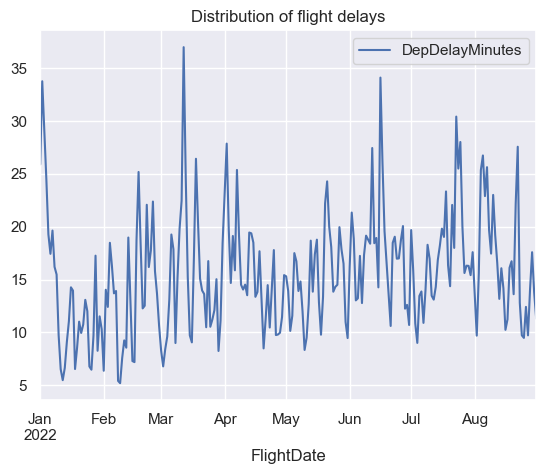

In [13]:
(df_flights
 .groupby("FlightDate")
 [["DepDelayMinutes"]]
 .mean()
 .plot(title="Distribution of flight delays"))


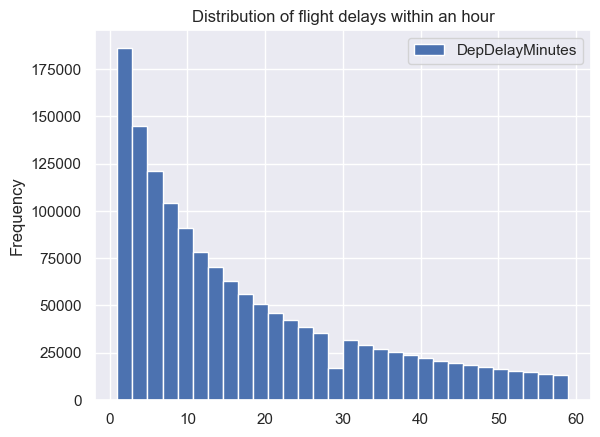

In [14]:
(df_flights
 .query("DepDelayMinutes > 0 and DepDelayMinutes < 60")
 [["DepDelayMinutes"]]
 .plot(kind="hist", bins=30, title="Distribution of flight delays within an hour"))
plt.show()


In [15]:
px.line(df_flights
        .groupby("FlightDate")
        [["DepDelayMinutes"]]
        .mean()
        )


#### Flight Status Categories

Departure Delay Groups

In [16]:
# Departure Delay intervals until 180 mins
def DepDelay_Class(df_flights):
    df_flights["DepDelayClass"] = None
    df_flights.loc[df_flights["DepDelayMinutes"] <= 15, "DepDelayClass"] = "OnTime"
    df_flights.loc[(df_flights["DepDelayMinutes"] > 15) & (df_flights["DepDelayMinutes"] <= 45), "DepDelayClass"] = "Delay15_45"
    df_flights.loc[(df_flights["DepDelayMinutes"] > 45), "DepDelayClass"] = "Delay45_180"
    df_flights.loc[df_flights["Cancelled"], "DepDelayClass"] = "Cancelled"
    
DepDelay_Class(df_flights)

<AxesSubplot: title={'center': 'Flight Delay Classes 2022'}>

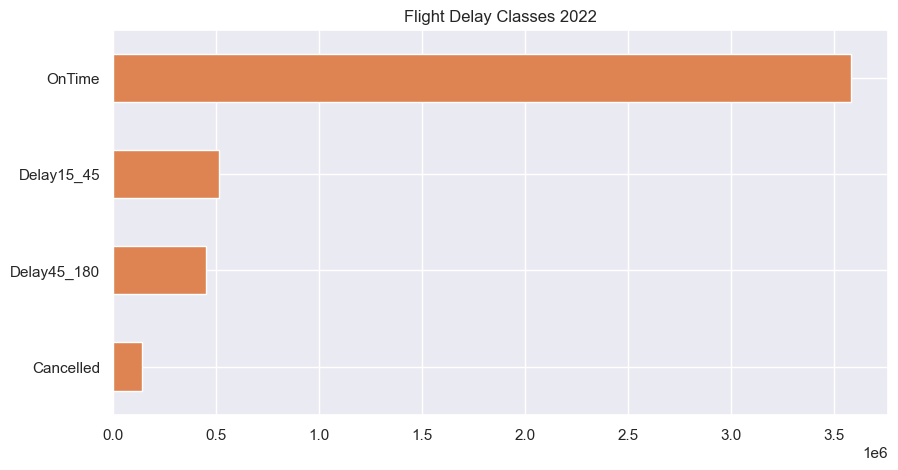

In [42]:
(df_flights
 .DepDelayClass
 .value_counts(ascending=True)
 .plot(kind='barh', figsize=(10,5), color=current_palette[1], title="Flight Delay Classes 2022")
 )

In [18]:
df_flights["DepDelayClass"].value_counts()/ df_flights.shape[0]

OnTime         0.764425
Delay15_45     0.109638
Delay45_180    0.096382
Cancelled      0.029556
Name: DepDelayClass, dtype: float64

In [19]:
# Factors affecting delay
# Assumption: A flight is counted as "on time" if it operated less than 15 minutes later than the
def flight_status(df_flights):
        df_flights["FlightStatus"]="OnTime"

        df_flights.loc[df_flights["DepDel15"] == 0, "FlightStatus"]="OnTime"
        df_flights.loc[(df_flights["DepDelayMinutes"] >= 0) & (df_flights["DepDelayMinutes"] <= 15), "FlightStatus"]="OnTime"
        df_flights.loc[df_flights["WeatherDelay"] > 15, "FlightStatus"]="WeatherDelay"
        df_flights.loc[df_flights["NASDelay"] > 15, "FlightStatus"]="NASDelay"
        df_flights.loc[df_flights["SecurityDelay"] > 15, "FlightStatus"]="SecurityDelay"
        df_flights.loc[df_flights["LateAircraftDelay"] > 15, "FlightStatus"]="LateAircraftDelay"
        df_flights.loc[df_flights["CarrierDelay"] > 15, "FlightStatus"]="CarrierDelay"
        df_flights.loc[df_flights["Cancelled"], "FlightStatus"]="Cancelled"
    

flight_status(df_flights)


<AxesSubplot: title={'center': 'Flight Status 2022'}>

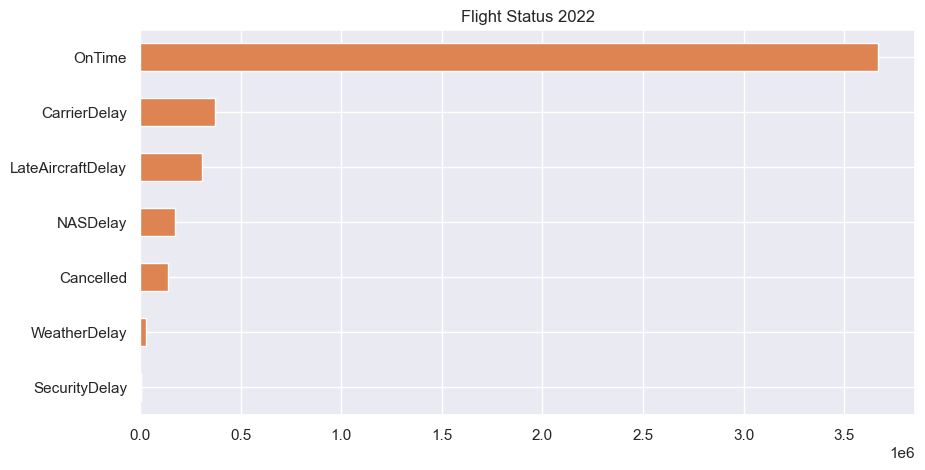

In [20]:
(df_flights
 .FlightStatus
 .value_counts(ascending=True)
 .plot(kind='barh', figsize=(10,5), color=current_palette[1], title="Flight Status 2022")
 )

In [21]:
df_agg = (df_flights
 .groupby([df_flights["FlightDate"].dt.month, "Operating_Airline"])
 [["FlightStatus"]]
 .value_counts()
 .unstack()
 )
df_agg.style.background_gradient(cmap="Greens")

In [22]:
#df_flights.loc[df_flights["ArrTime"] == 0]

In [23]:
(df_flights["FlightStatus"].value_counts())/df_flights.shape[0]

OnTime               0.781915
CarrierDelay         0.079508
LateAircraftDelay    0.065091
NASDelay             0.037432
Cancelled            0.029556
WeatherDelay         0.005985
SecurityDelay        0.000513
Name: FlightStatus, dtype: float64

In [24]:
df_flights["FlightStatus"].value_counts()

OnTime               3668719
CarrierDelay          373048
LateAircraftDelay     305406
NASDelay              175629
Cancelled             138675
WeatherDelay           28081
SecurityDelay           2409
Name: FlightStatus, dtype: int64

In [25]:
df_flights.head()

,FlightDate,Operating_Airline,Tail_Number,Flight_Number,OriginAirportID,Origin,OriginCityName,OriginState,OriginStateName,DestAirportID,Dest,DestCityName,DestState,DestStateName,CRSDepTime,DepTime,DepDelay,DepDel15,DepDelayMinutes,DepTimeBlk,TaxiOut,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelayMinutes,ArrDel15,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,AirTime,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,latitude,longitude,DepDelayClass,FlightStatus
0,2022-01-06,Delta Air Lines Inc.,N315DN,1581,11697,FLL,"Fort Lauderdale, FL",FL,Florida,12953,LGA,"New York, NY",NY,New York,1126,0.0,0.0,0.0,0.0,1100-1159,0.0,0.0,0.0,1419,0.0,0.0,0.0,1400-1459,True,Airline/Carrier,False,173.0,0.0,1076.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.072583,-80.152750,Cancelled,Cancelled
1,2022-01-06,Delta Air Lines Inc.,N545US,1582,10397,ATL,"Atlanta, GA",GA,Georgia,11697,FLL,"Fort Lauderdale, FL",FL,Florida,1631,1627.0,-4.0,0.0,0.0,1600-1659,15.0,1815.0,5.0,1821,1820.0,0.0,0.0,1800-1859,False,none,False,110.0,93.0,581.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.640444,-84.426944,OnTime,OnTime
2,2022-01-06,Delta Air Lines Inc.,N545US,1582,11697,FLL,"Fort Lauderdale, FL",FL,Florida,10397,ATL,"Atlanta, GA",GA,Georgia,1931,1929.0,-2.0,0.0,0.0,1900-1959,13.0,2104.0,10.0,2127,2116.0,0.0,0.0,2100-2159,False,none,False,116.0,83.0,581.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.072583,-80.152750,OnTime,OnTime
3,2022-01-06,Delta Air Lines Inc.,N345NB,1583,11697,FLL,"Fort Lauderdale, FL",FL,Florida,14492,RDU,"Raleigh/Durham, NC",NC,North Carolina,1024,1019.0,-5.0,0.0,0.0,1000-1059,17.0,1209.0,3.0,1227,1212.0,0.0,0.0,1200-1259,False,none,False,123.0,93.0,680.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.072583,-80.152750,OnTime,OnTime
4,2022-01-06,Delta Air Lines Inc.,N978AT,1584,10397,ATL,"Atlanta, GA",GA,Georgia,12448,JAN,"Jackson/Vicksburg, MS",MS,Mississippi,1117,1113.0,-4.0,0.0,0.0,1100-1159,14.0,1127.0,4.0,1142,1131.0,0.0,0.0,1100-1159,False,none,False,85.0,60.0,341.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.640444,-84.426944,OnTime,OnTime


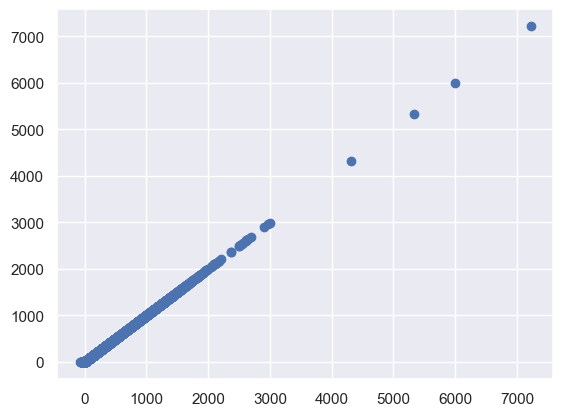

In [26]:
plt.scatter(df_flights["DepDelay"], df_flights["DepDelayMinutes"])

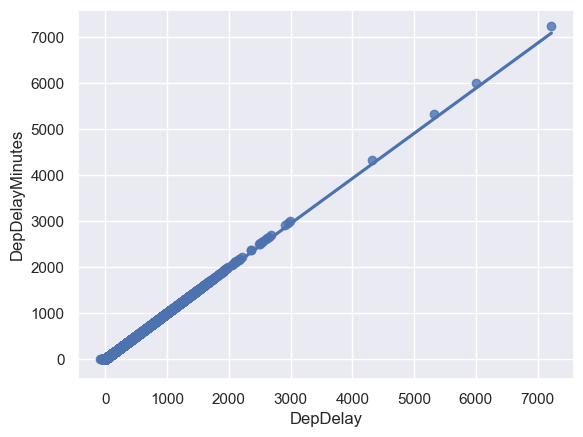

In [27]:
sns.regplot(x="DepDelay", y="DepDelayMinutes", data=df_flights)
plt.show()

In [28]:
(df_flights
 [["FlightStatus"]]
 .value_counts()
 .sort_values(ascending=False)
 .to_frame("Row Count")
 )

,Row Count
FlightStatus,
OnTime,3668719
CarrierDelay,373048
LateAircraftDelay,305406
NASDelay,175629
Cancelled,138675
WeatherDelay,28081
SecurityDelay,2409


#### Correlation [Pearson]

In [29]:
corr = (df_flights
        .select_dtypes('float16')
        .corr())
corr.style.background_gradient(cmap='coolwarm')


,DepTime,DepDelay,DepDel15,DepDelayMinutes,TaxiOut,WheelsOn,TaxiIn,ArrTime,ArrDelayMinutes,ArrDel15,CRSElapsedTime,AirTime,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime
DepTime,1.000000,0.133076,0.250080,0.129948,0.131614,0.693240,0.063722,0.663341,0.120610,0.222469,-0.013604,0.091511,-0.004102,0.039401,0.021194,0.057190,0.004569,0.127657,0.040475,0.024034
DepDelay,0.133076,1.000000,0.548335,0.997910,0.051616,0.036071,0.017112,0.029398,0.972308,0.508926,0.022724,0.028413,0.021589,0.731257,0.275693,0.242059,0.038098,0.591870,0.194756,0.195455
DepDel15,0.250080,0.548335,1.000000,0.530038,0.061194,0.123818,0.007356,0.112351,0.485089,0.747034,0.029611,0.049983,0.033488,0.289182,0.108302,0.169526,0.030617,0.375331,0.131456,0.102410
DepDelayMinutes,0.129948,0.997910,0.530038,1.000000,0.054493,0.035403,0.022915,0.029179,0.975506,0.494021,0.018152,0.026230,0.016364,0.736442,0.277687,0.240199,0.037885,0.592094,0.194445,0.196090
TaxiOut,0.131614,0.051616,0.061194,0.054493,1.000000,0.152091,0.073699,0.148759,0.154931,0.244984,0.076168,0.122944,0.037387,0.045944,0.054930,0.293551,0.002973,0.035166,0.018473,0.019728
WheelsOn,0.693240,0.036071,0.123818,0.035403,0.152091,1.000000,0.095980,0.966094,0.039863,0.118113,0.015502,0.124570,0.016844,0.001937,0.009138,0.048203,0.002280,0.035357,-0.008364,-0.020983
TaxiIn,0.063722,0.017112,0.007356,0.022915,0.073699,0.095980,1.000000,0.096328,0.095400,0.151333,0.094655,0.124435,0.071899,0.017157,0.017289,0.217296,0.001523,0.024135,-0.000705,-0.002943
ArrTime,0.663341,0.029398,0.112351,0.029179,0.148759,0.966094,0.096328,1.000000,0.033588,0.107704,0.012994,0.121106,0.013522,-0.000006,0.008498,0.044150,0.002122,0.029027,-0.010242,-0.021792
ArrDelayMinutes,0.120610,0.972308,0.485089,0.975506,0.154931,0.039863,0.095400,0.033588,1.000000,0.530604,0.011734,0.033710,0.010855,0.735698,0.287298,0.328339,0.038140,0.586642,0.181922,0.182758
ArrDel15,0.222469,0.508926,0.747034,0.494021,0.244984,0.118113,0.151333,0.107704,0.530604,1.000000,0.019573,0.065902,0.025041,0.304129,0.111748,0.321830,0.032743,0.382751,0.113747,0.084664


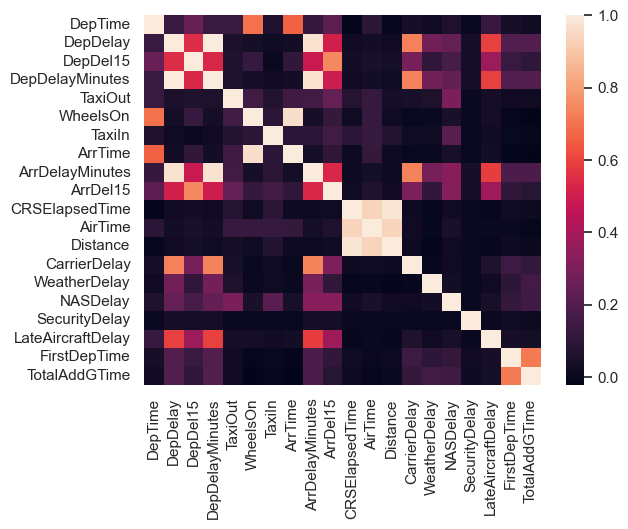

In [30]:
sns.heatmap(
    (df_flights
     .select_dtypes('float16')
     .corr()))
plt.show()


<AxesSubplot: xlabel='FlightDate'>

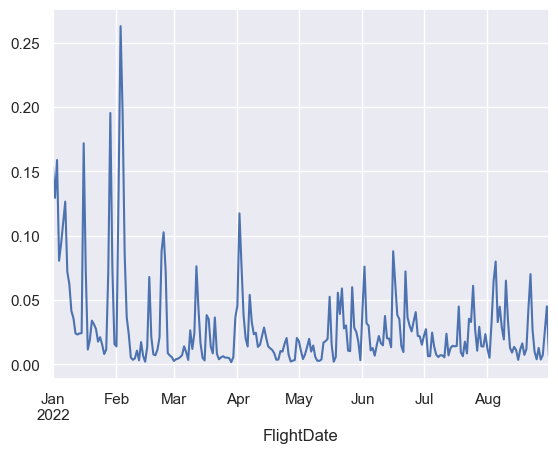

In [31]:
(df_flights.
 groupby("FlightDate")
 ["Cancelled"]
 .agg("mean")
 .plot()
 )


<AxesSubplot: xlabel='FlightDate'>

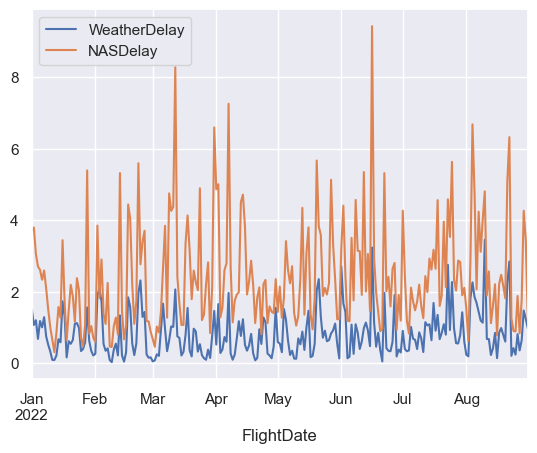

In [32]:
(df_flights.
 groupby("FlightDate")
 [["WeatherDelay", "NASDelay"]]
 .agg("mean")
 .plot())


<AxesSubplot: xlabel='FlightDate'>

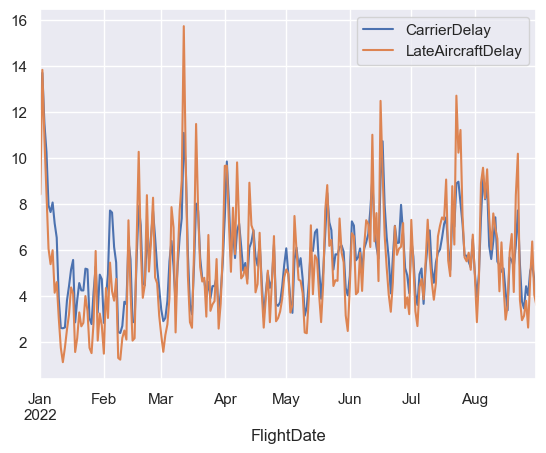

In [33]:
(df_flights.
 groupby("FlightDate")
 [["CarrierDelay", "LateAircraftDelay"]]
 .agg("mean")
 .plot())


##### Frequency Distribution Table

In [34]:
(df_flights
 [["Operating_Airline"]]
 .value_counts()
 .sort_values(ascending=False)
 .to_frame("Row Count")
 )


,Row Count
Operating_Airline,
Southwest Airlines Co.,850814
Delta Air Lines Inc.,590787
American Airlines Inc.,574280
SkyWest Airlines Inc.,504520
United Air Lines Inc.,406927
Republic Airlines,224567
JetBlue Airways,179893
Envoy Air,172616
Endeavor Air Inc.,162517


In [35]:
px.bar(
    df_flights["Operating_Airline"]
    .value_counts()
    .sort_values(ascending=True),
    orientation='h',
    template="plotly_dark",
    title="Flights per airline",
    height=700,
)


In [36]:
df_flights.head(3)

,FlightDate,Operating_Airline,Tail_Number,Flight_Number,OriginAirportID,Origin,OriginCityName,OriginState,OriginStateName,DestAirportID,Dest,DestCityName,DestState,DestStateName,CRSDepTime,DepTime,DepDelay,DepDel15,DepDelayMinutes,DepTimeBlk,TaxiOut,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelayMinutes,ArrDel15,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,AirTime,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,latitude,longitude,DepDelayClass,FlightStatus
0,2022-01-06,Delta Air Lines Inc.,N315DN,1581,11697,FLL,"Fort Lauderdale, FL",FL,Florida,12953,LGA,"New York, NY",NY,New York,1126,0.0,0.0,0.0,0.0,1100-1159,0.0,0.0,0.0,1419,0.0,0.0,0.0,1400-1459,True,Airline/Carrier,False,173.0,0.0,1076.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.072583,-80.152750,Cancelled,Cancelled
1,2022-01-06,Delta Air Lines Inc.,N545US,1582,10397,ATL,"Atlanta, GA",GA,Georgia,11697,FLL,"Fort Lauderdale, FL",FL,Florida,1631,1627.0,-4.0,0.0,0.0,1600-1659,15.0,1815.0,5.0,1821,1820.0,0.0,0.0,1800-1859,False,none,False,110.0,93.0,581.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.640444,-84.426944,OnTime,OnTime
2,2022-01-06,Delta Air Lines Inc.,N545US,1582,11697,FLL,"Fort Lauderdale, FL",FL,Florida,10397,ATL,"Atlanta, GA",GA,Georgia,1931,1929.0,-2.0,0.0,0.0,1900-1959,13.0,2104.0,10.0,2127,2116.0,0.0,0.0,2100-2159,False,none,False,116.0,83.0,581.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.072583,-80.152750,OnTime,OnTime


In [37]:
(df_flights.
 groupby(["Flight_Number", "Tail_Number", "OriginCityName","DestCityName" ])
[["DepDelayMinutes"]]
#.agg(["mean", "sum"]).head(20)
)


In [38]:
cols = ["FlightDate","Tail_Number","Flight_Number","Operating_Airline", "OriginCityName","DestCityName", "CRSDepTime", "DepTime","DepDelayMinutes","AirTime", "FlightStatus"]
(df_flights
 .loc[df_flights["DepDelayMinutes"] >10, cols ]
 .sort_values(by=["Flight_Number", "FlightDate", "CRSDepTime"],ascending=[True, True, True]))

,FlightDate,Tail_Number,Flight_Number,Operating_Airline,OriginCityName,DestCityName,CRSDepTime,DepTime,DepDelayMinutes,AirTime,FlightStatus
85851,2022-01-01,N388HA,1,Hawaiian Airlines Inc.,"Los Angeles, CA","Honolulu, HI",700,722.0,22.0,366.0,CarrierDelay
113924,2022-01-01,N908NK,1,Spirit Air Lines,"Fort Lauderdale, FL","Chicago, IL",2240,2254.0,14.0,158.0,OnTime
303525,2022-01-02,N112AN,1,American Airlines Inc.,"New York, NY","Los Angeles, CA",800,814.0,14.0,347.0,OnTime
113925,2022-01-02,N907NK,1,Spirit Air Lines,"Fort Lauderdale, FL","Chicago, IL",2240,10.0,90.0,148.0,LateAircraftDelay
402681,2022-01-04,N997JL,1,JetBlue Airways,"New York, NY","Fort Lauderdale, FL",543,632.0,49.0,147.0,LateAircraftDelay
383773,2022-01-06,N562AS,1,Alaska Airlines Inc.,"Washington, DC","Seattle, WA",800,901.0,61.0,338.0,NASDelay
85858,2022-01-08,N384HA,1,Hawaiian Airlines Inc.,"Los Angeles, CA","Honolulu, HI",700,722.0,22.0,345.0,CarrierDelay
405030,2022-01-08,N580JB,1,JetBlue Airways,"New York, NY","Fort Lauderdale, FL",730,748.0,18.0,144.0,OnTime
113931,2022-01-08,N671NK,1,Spirit Air Lines,"Fort Lauderdale, FL","Chicago, IL",2145,136.0,231.0,153.0,LateAircraftDelay
214806,2022-01-09,N8562Z,1,Southwest Airlines Co.,"Denver, CO","Salt Lake City, UT",1400,1430.0,30.0,58.0,OnTime


In [39]:
cols = ["FlightDate","Tail_Number","Flight_Number","Operating_Airline", "OriginCityName","DestCityName", "CRSDepTime", "DepTime","DepDelayMinutes","AirTime", "FlightStatus"]
(df_flights[cols]
 .groupby(["Flight_Number", "Operating_Airline"])
 [["DepDelayMinutes"]]
 .mean())

DepDelayMinutes
Flight_Number Operating_Airline                                         
1             Air Wisconsin Airlines Corp                            NaN
              Alaska Airlines Inc.                              8.020661
              Allegiant Air                                    20.928572
              American Airlines Inc.                            8.325103
              Capital Cargo International                            NaN
              Comair Inc.                                            NaN
              Commutair Aka Champlain Enterprises, Inc.              NaN
              Delta Air Lines Inc.                                   NaN
              Endeavor Air Inc.                                      NaN
              Envoy Air                                              NaN
...                                                                  ...
9680          GoJet Airlines, LLC d/b/a United Express               NaN
              Hawaiian Airlines Inc.                                 NaN
              Horizon Air                                            NaN
              JetBlue Airways                                        NaN
              Mesa Airlines Inc.                                     NaN
              Republic Airlines                                 0.000000
              SkyWest Airlines Inc.                                  NaN
              Southwest Airlines Co.                                 NaN
              Spirit Air Lines                                       NaN
              United Air Lines Inc.                                  NaN

[142821 rows x 1 columns]

In [40]:
col2 = ["CarrierDelay","WeatherDelay",	"NASDelay",	"SecurityDelay","LateAircraftDelay", "FirstDepTime", "TotalAddGTime", "latitude", "longitude", "DepDelayClass"]
cols = ["FlightDate","CRSDepTime", "DepTime","DepDelayMinutes","AirTime", "FlightStatus"]	

KeyError: 'DepDelayClass'

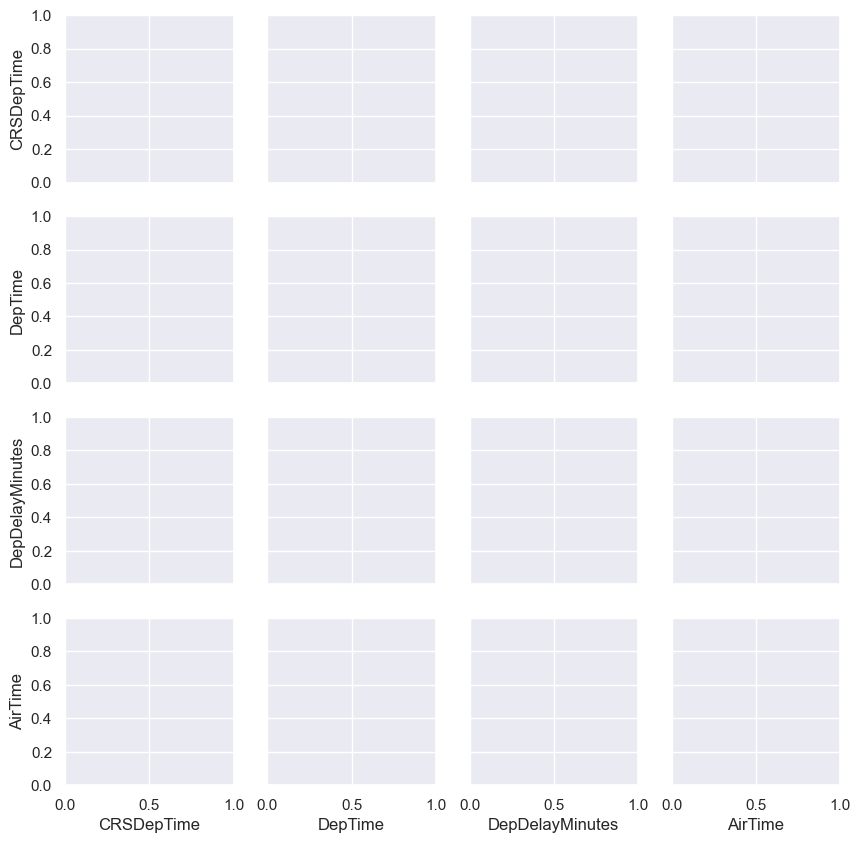

In [41]:

g = sns.pairplot(df_flights[cols], hue="DepDelayClass")
plt.show()